# 1. Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Import data
#### - "Bare nuclei" Column have a object type this is strange.
#### - "Bare nucle have "?" character as null value. This might be removed.

In [2]:
col = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", 
       "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]
df = pd.read_csv("breast-cancer-wisconsin.csv", names = col)

In [3]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
# 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [6]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
# Bare Nucle have "?" charactera s null value. This might be remoed.
find_que = df[df["Bare Nuclei"] == "?"].index
df.drop(find_que,inplace = True)
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


### Eliminate of Modify features
#### "Sample code number" : This is just id number. This column is not use.

In [8]:
feature_cols = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", 
       "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses","Class"]
df = df[feature_cols]
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


### Target Data
#### - 2 for benign
#### - 4 for malignant
#### 2,4 will be modified to 0, 1

In [9]:
df.Class.value_counts()

2    444
4    239
Name: Class, dtype: int64

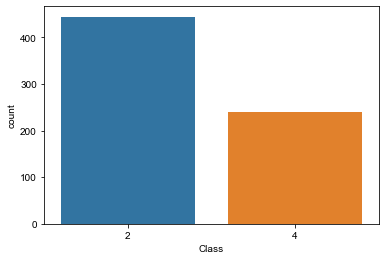

In [10]:
sns.countplot(x = "Class", data = df)
sns.set(font_scale = 1.5)
plt.show()

In [11]:
df = df.replace({"Class" : 2}, 0)
df = df.replace({"Class" : 4}, 1)
df.Class.value_counts()

0    444
1    239
Name: Class, dtype: int64

### Data Visualization

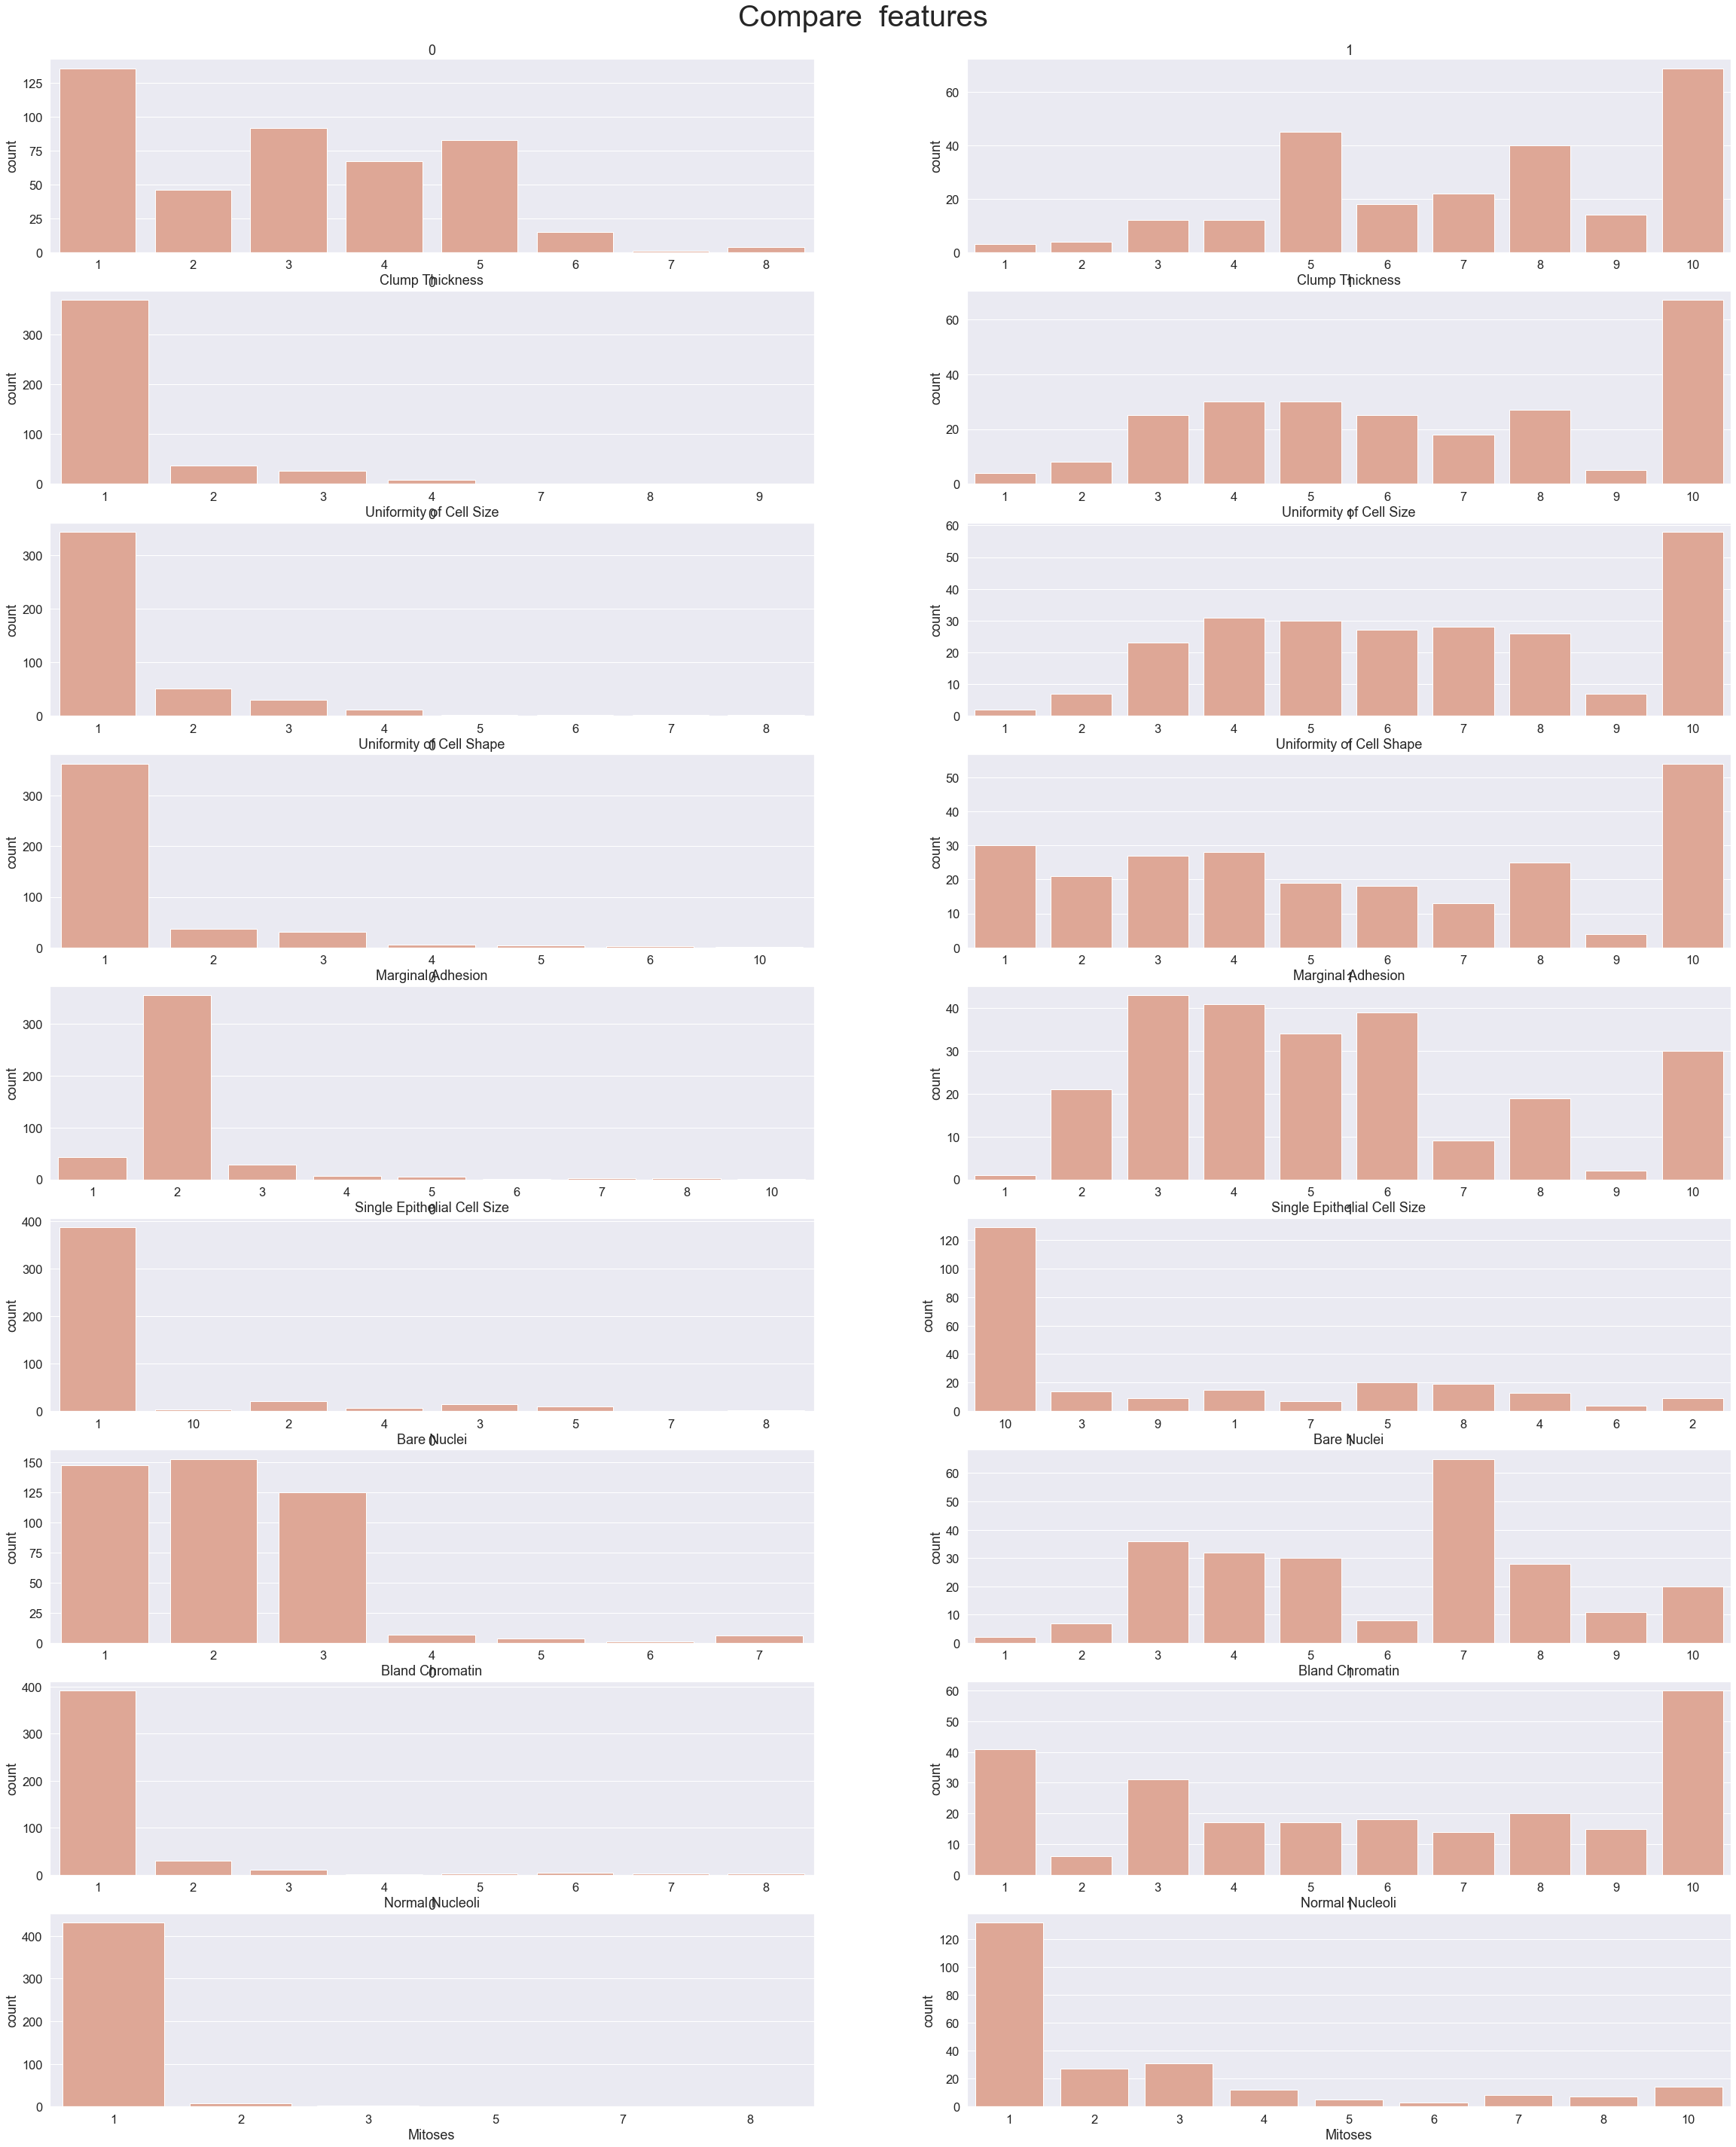

In [12]:
def visualize(axx, field, num):  ##method to draw graph
    sns.countplot(df.columns[num], data= df[df['Class'] == field],  color='#eaa18a', ax = axx) # countplot을 이용하여 그래프를 그려줍니다.
    axx.set_title(field)

figure, ((ax1,ax2), (ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10),
         (ax11,ax12),(ax13,ax14), (ax15, ax16), (ax17, ax18))  = plt.subplots(nrows=9, ncols=2) ## 원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare  features', fontsize=40, y = 0.9)

k = 0 # number of features
j = 1 # number of graphs
while k<9: 
    for i in range(0,2):
        visualize(eval(f'ax{j}'), df['Class'].unique()[i], k)
        j = j+1
    k = k+1

# 2. Data Preparation

### Correlation analysis
#### - Since the correlation coefficient between all data and "Class" is 0.4 or higher, all columns are used.

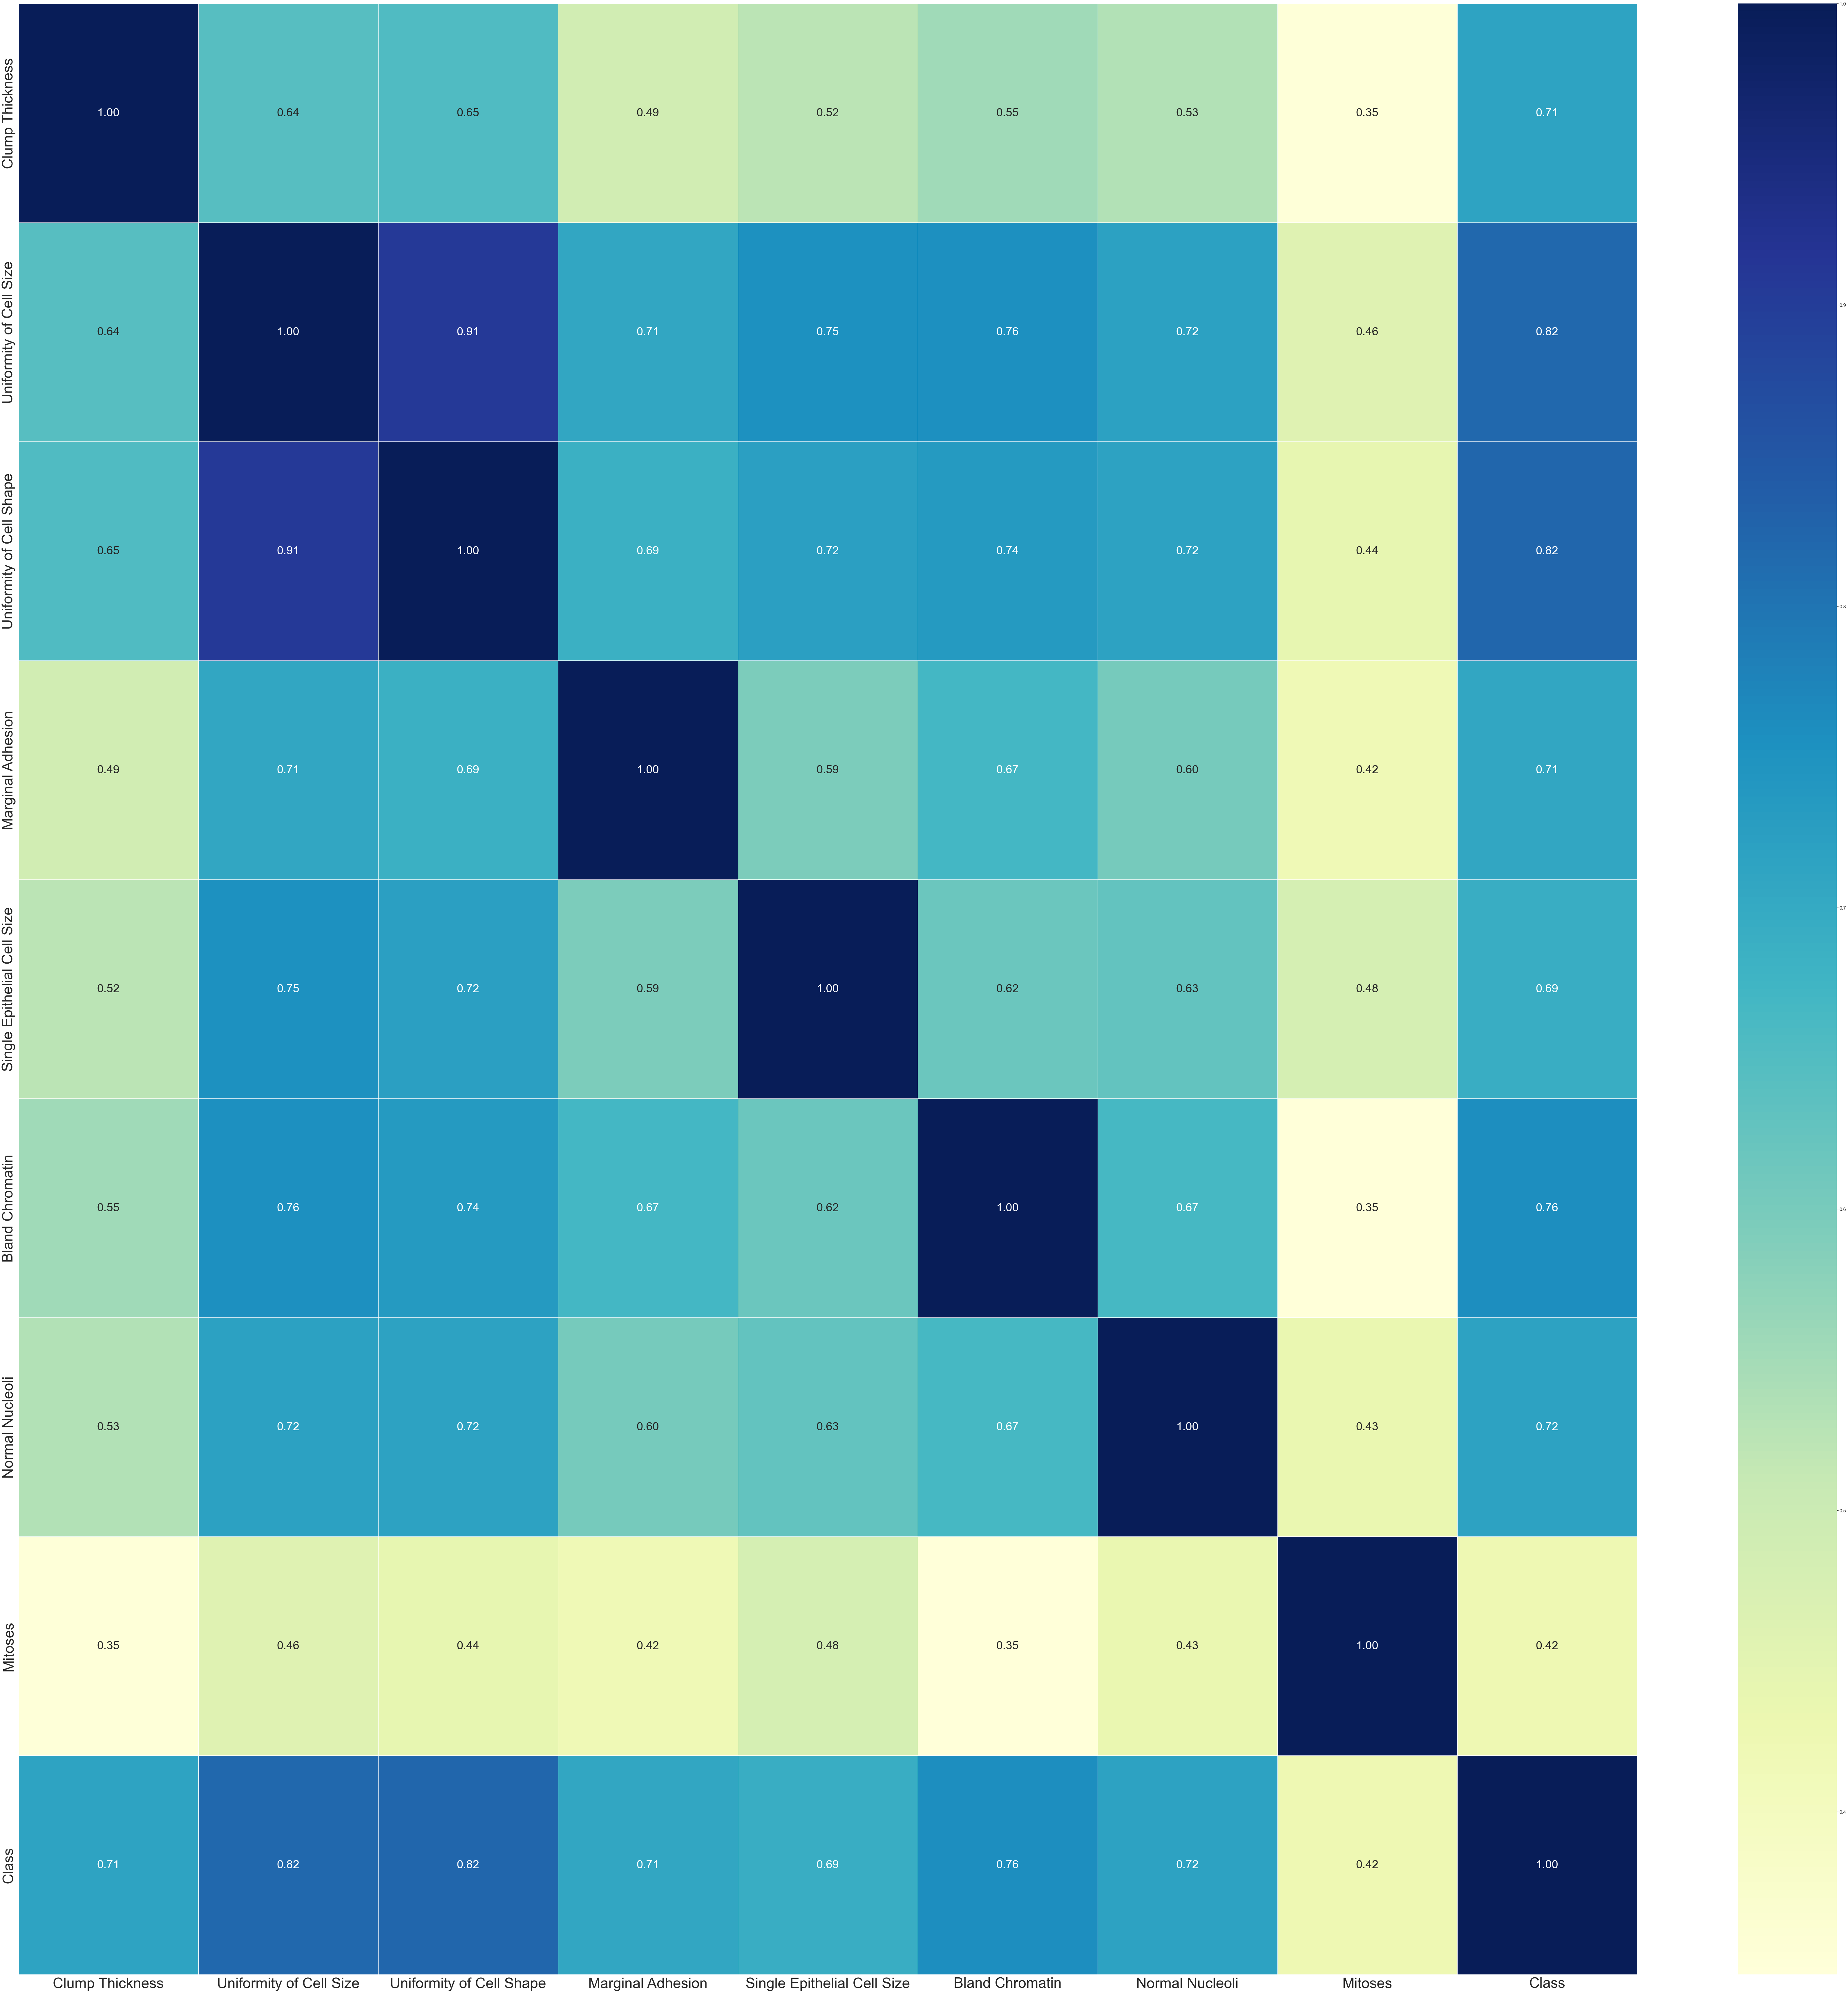

In [13]:
fig, ax = plt.subplots(figsize=(125,125))
sns.heatmap(df.corr(), annot=True, annot_kws={'size':40}, fmt='0.2f', cmap="YlGnBu", linewidths=0.5)
ax.tick_params(axis='both', labelsize=50);
plt.show()

In [14]:
df.corr()['Class'].sort_values(ascending = False)

Class                          1.000000
Uniformity of Cell Shape       0.821891
Uniformity of Cell Size        0.820801
Bland Chromatin                0.758228
Normal Nucleoli                0.718677
Clump Thickness                0.714790
Marginal Adhesion              0.706294
Single Epithelial Cell Size    0.690958
Mitoses                        0.423448
Name: Class, dtype: float64

In [15]:
df.drop('Mitoses', axis=1, inplace=True)
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Class
0,5,1,1,1,2,1,3,1,0
1,5,4,4,5,7,10,3,2,0
2,3,1,1,1,2,2,3,1,0
3,6,8,8,1,3,4,3,7,0
4,4,1,1,3,2,1,3,1,0
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,0
695,2,1,1,1,2,1,1,1,0
696,5,10,10,3,7,3,8,10,1
697,4,8,6,4,3,4,10,6,1


# 3. Main functions

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import  GridSearchCV

## cunfusion metrix function

In [28]:
def confusion_m(y_test, y_pred, score):
    cm = metrics.confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = 'Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15)

## model learning function

In [171]:
def cf_learning(model, parameters, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test, y_test)
    
    # K-Fold
    k = [5,7,10]
    scores = []
    
    for i in k:
        scores.append(cross_val_score(model, X_train, y_train, cv=i).mean())
        
    k_score = max(scores)
    best_k = k[scores.index(max(scores))]
    
    # GridSearchCV
    grid_dt = GridSearchCV(model, param_grid = parameters, cv=best_k)
    grid_dt.fit(X_train,y_train)
    grid_result = grid_dt.best_params_
    
    # print the results
    #print('model :', type(model).__name__)
    #print('best cv :', best_k)
    #print('Accuracy :', score)
    #print('Cross validation mean :', k_score.mean())
    #print(grid_result)
    # confusion_metrix
    #confusion_m(y_test, y_pred, score)
    #print()
    
    return {'model': type(model).__name__,
            'best_cv': best_k,
            'Accuracy': score,
            'Cross_validation_mean': k_score.mean(),
            'grid_result': grid_result,
            'y_test': y_test,
            'y_pred': y_pred}

In [176]:
def cf(X, y):
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, shuffle=True)
    
    # Standard Scaler
    std_scaler = StandardScaler()
    std_scaler.fit(X_train)
    std_X_train = std_scaler.transform(X_train)
    std_X_test = std_scaler.transform(X_test)
    
    # MinMax Scaler
    mm_scaler = MinMaxScaler()
    mm_scaler.fit(X_train)
    mm_X_train = mm_scaler.transform(X_train)
    mm_X_test = mm_scaler.transform(X_test)
    
    # MaxAbs Scaler
    ma_scaler = MaxAbsScaler()
    ma_scaler.fit(X_train)
    ma_X_train = ma_scaler.transform(X_train)
    ma_X_test = ma_scaler.transform(X_test)
    
    # Robust Scaler
    r_scaler = RobustScaler()
    r_scaler.fit(X_train)
    r_X_train = r_scaler.transform(X_train)
    r_X_test = r_scaler.transform(X_test)
    
    models = []
    
    # Decision tree Entropy model
    dtc_e = DecisionTreeClassifier(criterion='entropy')
    dtc_e_param = {'max_depth' : [3,4,5,7],
                   'min_samples_split': [3, 5],
                   'splitter': ['best', 'random']}
    models.append({'name': dtc_e,
                   'param': dtc_e_param})
    
    
    # Decision tree Gini model
    dtc_g = DecisionTreeClassifier(criterion='gini')
    dtc_g_param = {'max_depth' : [3,4,5,7],
                   'min_samples_split': [3, 5],
                   'splitter': ['best', 'random']}
    models.append({'name': dtc_g,
                   'param': dtc_g_param})
    
    # Logistic Regression model
    logi_r = LogisticRegression()
    logi_r_param = {'penalty' : ['none','l2','l1','elasticnet']}
    models.append({'name': logi_r,
                   'param': logi_r_param})

    # SVM model
    svm = SVC()
    svm_param = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
                 'kernel' : ['linear','poly','rbf','sigmoid'],
                 'gamma' : [0.01, 0.05, 0.1, 0.5, 1.0, 3.0, 7.0]}
    models.append({'name': svm,
                   'param': svm_param})
    

    result = []
    result_df = pd.DataFrame(columns=['model', 'best_cv', 'accuracy', 'cross_validation_mean','grid_result'])
    
    for model in models:
        # normal
        cf_result = cf_learning(model['name'], model['param'], X_train, y_train, X_test, y_test)
        cf_result['scaler'] = 'normal'
        result.append(cf_result)
        
        # standard scaler
        cf_result = cf_learning(model['name'], model['param'], std_X_train, y_train, std_X_test, y_test)
        cf_result['scaler'] = 'standard scaler'
        result.append(cf_result)
        
        # minmax scaler
        cf_result = cf_learning(model['name'], model['param'], std_X_train, y_train, std_X_test, y_test)
        cf_result['scaler'] = 'minmax scaler'
        result.append(cf_result)
        
        # maxabs scaler
        cf_result = cf_learning(model['name'], model['param'], ma_X_train, y_train, ma_X_test, y_test)
        cf_result['scaler'] = 'maxabs scaler'
        result.append(cf_result)
        
        # robust scaler
        cf_result = cf_learning(model['name'], model['param'], r_X_train, y_train, r_X_test, y_test)
        cf_result['scaler'] = 'robust scaler'
        result.append(cf_result)
    
    result_df = pd.DataFrame(columns=['k','a'])
    k = 0
    for i in result:  
        a = i['Accuracy']
        result_df.loc[k] = [k, a]
        k += 1
        
    result_df = result_df.sort_values(by=['a'], ascending=False)
        
    print('---best 5---')
    for i in range(5):
        loc = int(result_df.iloc[i].values[0].item(0))
        print('scaler :', result[loc]['scaler'])
        print('model :', result[loc]['model'])
        print('best cv :', result[loc]['best_cv'])
        print('Accuracy :', result[loc]['Accuracy'])
        print('Cross validation mean :', result[loc]['Cross_validation_mean'])
        print(result[loc]['grid_result'])
        print()
        
        confusion_m(result[loc]['y_test'], result[loc]['y_pred'], result[loc]['Accuracy'])

# 4. Get Results

---best 5---
scaler : normal
model : LogisticRegression
best cv : 10
Accuracy : 0.9707724425887265
Cross validation mean : 0.9657142857142855
{'penalty': 'none'}

scaler : standard scaler
model : LogisticRegression
best cv : 10
Accuracy : 0.9665970772442589
Cross validation mean : 0.9657142857142855
{'penalty': 'none'}

scaler : minmax scaler
model : LogisticRegression
best cv : 10
Accuracy : 0.9665970772442589
Cross validation mean : 0.9657142857142855
{'penalty': 'none'}

scaler : minmax scaler
model : SVC
best cv : 10
Accuracy : 0.964509394572025
Cross validation mean : 0.9754761904761903
{'C': 1, 'gamma': 0.5, 'kernel': 'sigmoid'}

scaler : standard scaler
model : SVC
best cv : 10
Accuracy : 0.964509394572025
Cross validation mean : 0.9754761904761903
{'C': 1, 'gamma': 0.5, 'kernel': 'sigmoid'}



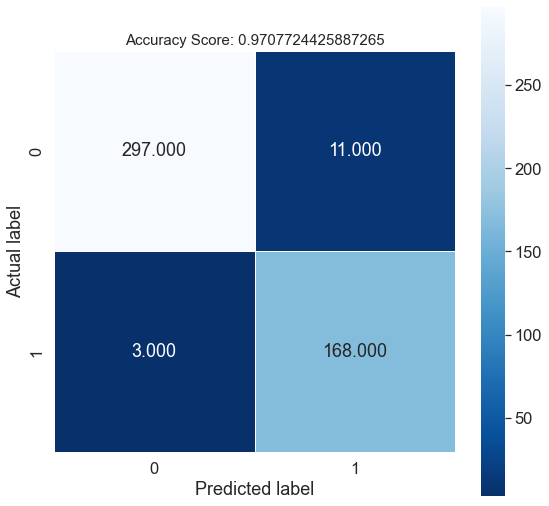

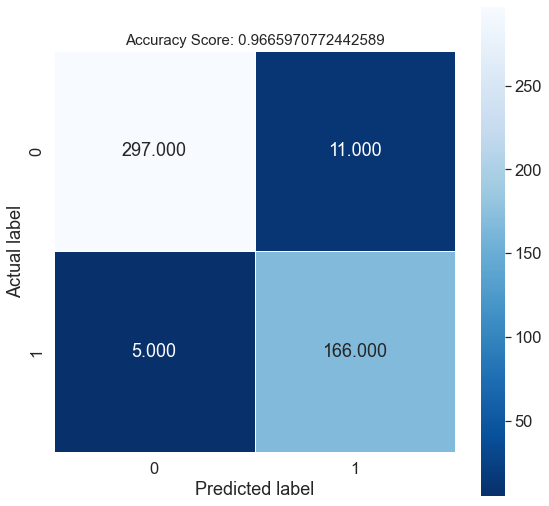

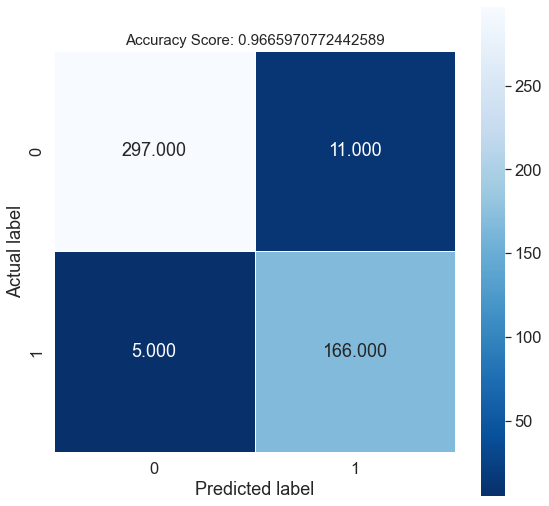

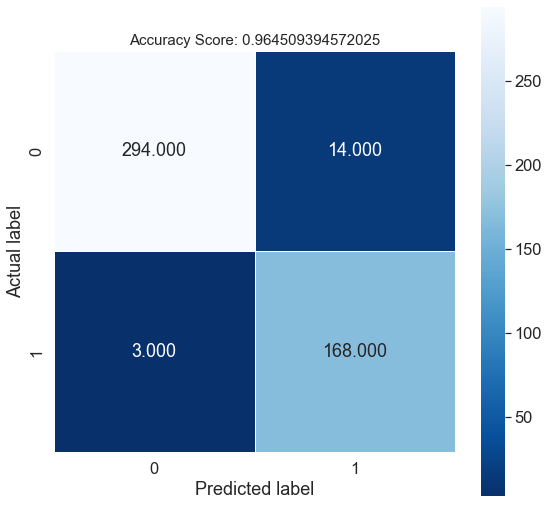

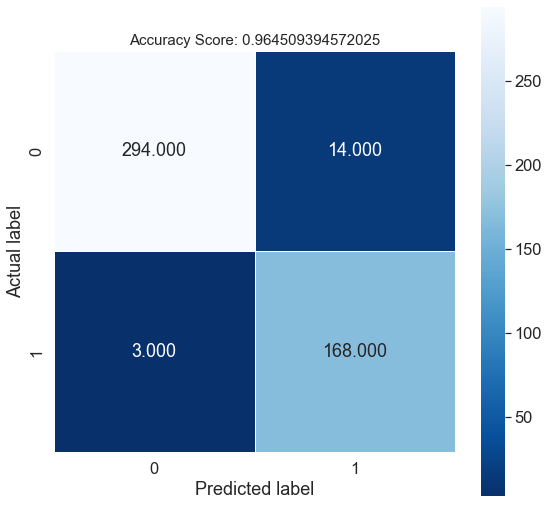

In [177]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
cf(X, y)